## Polinomio Interpolante de Lagrange
Dados los $n+1$ nodos  $( x_{0} , f(x_{0}) ) , ( x_{1} , f(x_{1}) , ( x_{2} , f(x_{2}) , ....... ( x_{n} , f(x_{n}) )$, se busca un polinomio $P_{n}(x)$ tal que:
$$P_{n}(x_{i})=f(x_{i})$$ 
Cabe destacar que el polinomio que se obtiene es unico y pasa por cada uno de los nodos
con el modelo de Lagrange:
$$P_{n}(x) = \sum_{i=1}^{n}[\prod_{j=0}^{n}(\frac{x-x_{i}}{x_{i}-x_{j}})] f(x_{i})$$
Donde: 
<center>$L_{i}=\prod_{j=0}^{n}(\frac{x-x_{j}}{x_{i}-x_{j}})$ con j $\neq 0$</center>
Obteniendo como formula general:
$$P_{n}(x) = \sum_{i=1}^{n} L_{i} * f(x_{i})$$
Por lo que se puede ver de la forma extendida:
$$P_{n}(x) = L_{0}f(x_{0}) + L_{2}f(x_{2}) +L_{3}f(x_{3}) + ...... + L_{n}f(x_{n})$$
Donde:
$$L_{i}=\prod_{j=0}^{n}(\frac{x-x_{j}}{x_{i}-x_{j}}) = (\frac{x-x_{1}}{x_{0}-x_{1}}) (\frac{x-x_{2}}{x_{0}-x_{2}})  (\frac{x-x_{3}}{x_{0}-x_{3}}) * ...... * \frac{x-x_{n}}{x_{0}-x_{n}}$$

In [1]:
%matplotlib inline
from sympy import *;
from numpy import *;
from ipywidgets import widgets
import math
from IPython.display import display, Math, Latex
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import pylab
import pandas as pd

init_printing()

x = Symbol('x')
g = Function('g')(x)
f = Function('f')(x)
p = Function('p')(x)


In [2]:
option_drop = widgets.Dropdown(
            options={'Función y valores en x':1,'Valores x y valores y':2},
            value=1,
            description='Seleccionar:',
        )
display(option_drop)

Dropdown(description='Seleccionar:', options={'Función y valores en x': 1, 'Valores x y valores y': 2}, value=…

In [3]:
if option_drop.value==1:
    print("Ingrese los valores en x:")
    text_x=widgets.Text();
    
    display(text_x)
    print("Ingrese funcion f(x)=")
    text_function=widgets.Text()
    display(text_function)
else:
    print("Ingrese los valores en x:")
    text_x=widgets.Text();
    display(text_x)
    print("Ingrese los valores en y:")
    text_y=widgets.Text()
    display(text_y)

Ingrese los valores en x:


Text(value='')

Ingrese funcion f(x)=


Text(value='')

In [11]:
g=0
if option_drop.value==1:
    try:
        yi=[]
        g = sympify(text_function.value)
        for i in range(0,len(xi)):
            yi.append(g.subs(x,xi[i]));
    except:
        display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar funcion.</h3>"));
    xi = text_x.value.split(",")
    xi = set(xi)
    
else:
    xi = text_x.value.split(",")
    xi = set(xi)
    yi= text_y.value.split(",")
    
try:
    xi = list(map(float, xi))
    yi = list(map(float, yi))
    xi = sorted(xi)
    
except:
    display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar que sean valores numericos.</h3>"));
    
    

In [12]:
if len(xi)==len(yi):
    p=0
    if (len(xi)==len(yi)):
            for i in range(len(xi)):
                f=1
                for j in range(len(xi)):  
                    if (i != j):  
                        f = f * ((x - xi[j])/(xi[i]-xi[j]))
                p = p + (yi[i] * f)

    p=simplify(p)
    display(HTML("<h3>Polinimio Interpolante: </h3>"));
    display(Math("P(x)="+latex(p)))
else:
     display(HTML("<h3 style='color:red'>Error en los datos, porfavor verificar logitud de valors x y.</h3>"));


<IPython.core.display.Math object>

In [7]:
if len(xi)==len(yi):
    print("Evaluar polinomio en un punto")
    text_value = widgets.BoundedFloatText(
        value=0.0,
        step=0.1,
        description='x:',
        disabled=False
    )
    display(text_value)
    

Evaluar polinomio en un punto


BoundedFloatText(value=0.0, description='x:', step=0.1)

In [8]:
if len(xi)==len(yi):
    if(text_value != ""):
        display(Math("P("+latex(text_value.value)+")="+latex(p.subs(x,text_value.value))))

<IPython.core.display.Math object>

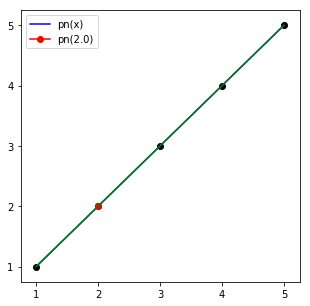

In [10]:
if len(xi)==len(yi):
    try:
        fig,ax = plt.subplots(figsize=(5,5))
        f_l = lambdify(x,p)
        xv = linspace(xi[0],xi[len(xi)-1],50)
        ax.plot(xv, f_l(xv),color='blue');
        ax.scatter(xi,yi,color='black', marker='o');
        ax.plot(text_value.value,p.subs(x,text_value.value), color ='red',marker='o');
        if(g!=0):
            g_l = lambdify(x,g)
            ax.plot(xv, g_l(xv),color='green');

        ax.legend(["pn(x)","pn("+ str(text_value.value) +")"]);
    except:
        display(HTML("<h2 style='color:red'>Algo ocurrio mal, porfavor verifica los datos introducidos</h2>"))
else:
    display(HTML("<h2 style='color:red'>Algo ocurrio mal, porfavor verifica longuitud de los datos x y</h2>"))
    